**Михаил, привет!**

Меня зовут Артемьева Саша, я буду проверять твой проект. Приятно познакомиться, хоть и заочно:)
    
Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 


<div class="alert alert-info"> <b>Комментарий студента:</b> Привет, Саша! Приятно познакомиться, взаимно (=.</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Молодец, что задал шапку профиля! Еще в ней стоит написать шаги исследования и цели, которые мы должны достигнуть в финале работы

Задача проекта — выполнить предобработку данных и изучить их, найти особенности и зависимости, которые существуют на рынке недвижимости. Для этого выполнить шаги:

**Шаг 1. Открыть файл с данными и изучить общую информацию**

**Шаг 2. Предобработка данных**

**Шаг 3. Добавить в таблицу новые столбцы с параметрами по заданию**

**Шаг 4. Провести исследовательский анализ данных**

**Шаг 5. Сделать общий вывод**

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Отлично!

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 30)

In [2]:
#прочитаем файл с данными и сохраним в переменную

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#осмотрим общую информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных:**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

* balcony — число балконов

* ceiling_height — высота потолков (м)

* cityCenters_nearest — расстояние до центра города (м)

* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

* first_day_exposition — дата публикации

* floor — этаж

* floors_total — всего этажей в доме

* is_apartment — апартаменты (булев тип)

* kitchen_area — площадь кухни в квадратных метрах (м²)

* last_price — цена на момент снятия с публикации

* living_area — жилая площадь в квадратных метрах (м²)

* locality_name — название населённого пункта

* open_plan — свободная планировка (булев тип)

* parks_around3000 — число парков в радиусе 3 км

* parks_nearest — расстояние до ближайшего парка (м)

* ponds_around3000 — число водоёмов в радиусе 3 км

* ponds_nearest — расстояние до ближайшего водоёма (м)

* rooms — число комнат

* studio — квартира-студия (булев тип)

* total_area — общая площадь квартиры в квадратных метрах (м²)

* total_images — число фотографий квартиры в объявлении

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Здорово, что воспользовался этим методом! Он выводит все нужные статистики по данным и мы можем понять общую картину и выявить аномалии

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> По ТЗ нам также нужно построить общую гистограмму для нашего датафрейма

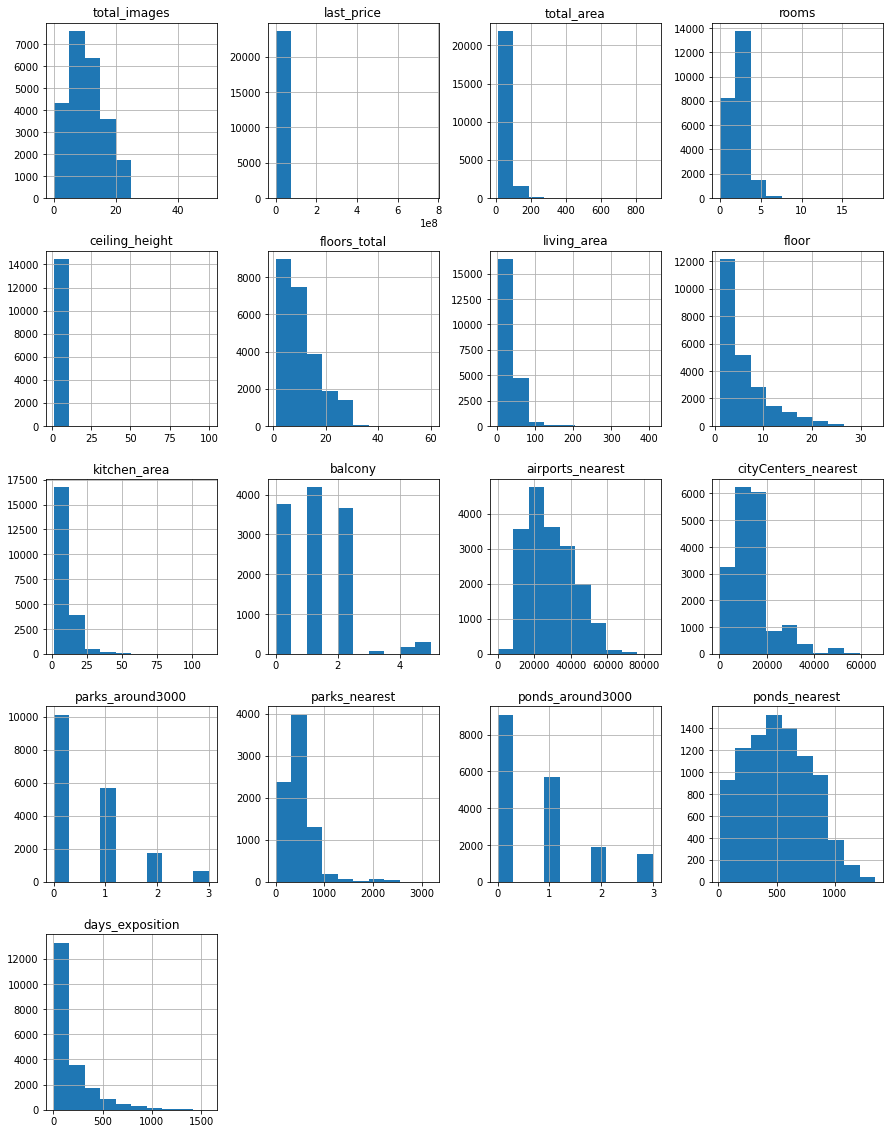

In [6]:
#построим распределения для всей таблицы

data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Теперь все задания выполнены. Гистограммы помогают нам визуально найти аномалии

### Предобработка данных

In [7]:
#подсчитаем количество пропусков в таблице

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#подсчёт процента числа пропусков

round(data.isna().sum() * 100 / len(data), 2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Здорово, что вывел долю пропусков, так видим, что можно сразу удалить, а что нужно обработать. 

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Долю еще можно вывести так:
        
        df.isna().mean()

Видно большое число пропусков в картографических данных, растоянии до прудов, парков, центра города и т.д. Их вряд ли удастся заполнить без знания положения объекта, оставим как есть. Аналогично с днями в продаже, объявление могло быть актуально на момент выгрузки данных, здесь можно заменить маркером. Число пропусков в названии населенных пунктов и общим числом этаже незначительно, менее процента в сумме, эти строки можно сбросить. Остальные попытаемся обработать.

In [9]:
#если число балконов не указано, можно принять, что их просто нет, заменим нулями

data['balcony'] = data['balcony'].fillna(0)

In [10]:
#если число комнат больше нуля, значит это не студия и не объекст с открытой планировкой

for room in data['rooms'].unique():
    data.loc[(data['rooms'] > 0) & (data['is_apartment'].isna()), 'is_apartment'] = True
    
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == 0) & (data['is_apartment'].isna()), 'is_apartment'] = False

In [11]:
#пропущенную высоту потолков заменим медианным значением для каждого населенного пункта

for local in data['locality_name'].unique():
    data.loc[(data['locality_name'] == local) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[data['locality_name']==local, 'ceiling_height'].median()

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видно, что остались пропуски, значит, для этого населенного пункта значений нет, медиану посчитать нельзя. Заменим на минимально допустимый уровень по строительным нормам, 2.4м.

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.4)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Корректно

In [14]:
#для жилой площади подсчитаем медианный коэффициент отношения к общей площади в зависимости от числа комнат

living_area_coef = data.pivot_table(index='rooms', values=['total_area', 'living_area'], aggfunc='median')

living_area_coef['coef'] = living_area_coef['living_area'] / living_area_coef['total_area']

living_area_coef

,living_area,total_area,coef
rooms,,,
0,18.000,26.05,0.690979
1,17.600,36.56,0.481400
2,30.500,53.00,0.575472
3,45.000,73.00,0.616438
4,63.600,99.30,0.640483
5,91.785,146.45,0.626733
6,123.900,184.30,0.672273
7,145.000,214.00,0.677570
8,161.000,235.70,0.683072


In [15]:
#для соответствующего числа комнат домножаем общую площадь на коэффициент 

for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms']==room) & (data['living_area'].isna()), 'total_area'] * \
    living_area_coef.loc[room, 'coef']

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [17]:
#аналогично считаем отношение площади кухни к общей

kitchen_area_coef = data.pivot_table(index='rooms', values=['total_area', 'kitchen_area'], aggfunc='median')

kitchen_area_coef['coef'] = kitchen_area_coef['kitchen_area'] / kitchen_area_coef['total_area']

kitchen_area_coef

,kitchen_area,total_area,coef
rooms,,,
0,NaN,26.05,NaN
1,9.04,36.56,0.247265
2,8.80,53.00,0.166038
3,9.50,73.00,0.130137
4,11.10,99.30,0.111782
5,15.10,146.45,0.103107
6,19.50,184.30,0.105806
7,20.00,214.00,0.093458
8,25.00,235.70,0.106067


In [18]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms']==room) & (data['kitchen_area'].isna()), 'total_area'] * \
    kitchen_area_coef.loc[room, 'coef']

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Остались пропуски. Как видно из таблицы коэффициентов, для студий и квартир с открытой планировкой кухни отдельной нет. Проверим:

In [20]:
data.query('kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.70,24.0,15.500000,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.75,14.0,17.000000,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.70,17.0,24.750000,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.64,26.0,24.300000,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.63,10.0,17.274472,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.70,25.0,18.000000,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.70,24.0,18.000000,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.70,19.0,17.965451,8,False,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.56,9.0,18.000000,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Действительно, пропуски остались для студий и открытой планировки, можно заполнить их нулями.

In [21]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [22]:
round(data.isna().sum() * 100 / len(data), 2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height           0.00
floors_total             0.36
living_area              0.00
floor                    0.00
is_apartment             0.00
studio                   0.00
open_plan                0.00
kitchen_area             0.00
balcony                  0.00
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

In [23]:
#сброс строк

data = data.query('floors_total.isna() == False and locality_name.isna() == False')

#заменяем пропуски в днях в продаже маркером -100, который далее можно отфильтровать по необходимости

data['days_exposition'] = data['days_exposition'].fillna(-100)

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Главное - не забыть про эту заглушку при дальнейшем анализе. Она исказит результаты

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> После заполнения пропусков важно проверить, не превышает ли сумма площадей кухни и жилой площади общую площадь:
    
        Должно быть: площадь кухни + жилая площадь < общая площадь

In [24]:
#проверяем сумму площадей кухни и жилой, должна быть меньше общей

round(data.query('kitchen_area + living_area > total_area')['total_area'].count() / len(data), 3)

0.005

In [25]:
#аномальные значения отбросим, их немного

data = data.query('kitchen_area + living_area < total_area')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Здорово, что нашел долю прежде чем отбрасывать выбросы

#### Поиск неявных дубликатов

In [26]:
pd.set_option('display.max_rows', 500)

data['locality_name'].value_counts()

Санкт-Петербург                                            15538
посёлок Мурино                                               510
посёлок Шушары                                               437
Всеволожск                                                   390
Пушкин                                                       368
Колпино                                                      337
посёлок Парголово                                            326
Гатчина                                                      303
деревня Кудрово                                              295
Выборг                                                       234
Петергоф                                                     199
Сестрорецк                                                   182
Красное Село                                                 176
Кудрово                                                      169
деревня Новое Девяткино                                      142
Сертолово                

Видно, что названия могут дублироваться из-за использования букв е\ё, а также из-за разного набора вспомогательных слов перед названием населенных пунктов.

In [27]:
#заменим ё на е, а также заменим вспомогательные слова пустой строкой, сначала длинные фразы, потом короткие

data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex = True)

data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '', regex = True)

data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '', regex = True)

data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '', regex = True)

data['locality_name'] = data['locality_name'].str.replace('деревня ', '', regex = True)

data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex = True)

data['locality_name'] = data['locality_name'].str.replace('село ', '', regex = True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Здорово, что поработал с названиями населенных пунктов! Так избавились от неявных дублей

In [28]:
#проверяем

data['locality_name'].value_counts()

Санкт-Петербург                                            15538
Мурино                                                       573
Кудрово                                                      464
Шушары                                                       437
Всеволожск                                                   390
Пушкин                                                       368
Колпино                                                      337
Парголово                                                    326
Гатчина                                                      303
Выборг                                                       234
Петергоф                                                     199
Сестрорецк                                                   182
Красное Село                                                 176
Новое Девяткино                                              142
Сертолово                                                    141
Ломоносов                

In [29]:
pd.reset_option('display.max_rows')

#### Замена типов данных

In [30]:
data['is_apartment'] = data['is_apartment'].astype(bool)   #является ли апартаментами - это булев тип

data['balcony'] = data['balcony'].astype(int) #число балконов целое

data['floors_total'] = data['floors_total'].astype(int) #число этажей тоже

data['last_price'] = data['last_price'].astype(int) #для удобства цену округлим до целого

data['days_exposition'] = data['days_exposition'].astype(int) #с днями аналогично

#дату переведём в соответствующий формат для удобства дальнейшей работы
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23378 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23378 non-null  int64         
 1   last_price            23378 non-null  int64         
 2   total_area            23378 non-null  float64       
 3   first_day_exposition  23378 non-null  datetime64[ns]
 4   rooms                 23378 non-null  int64         
 5   ceiling_height        23378 non-null  float64       
 6   floors_total          23378 non-null  int64         
 7   living_area           23378 non-null  float64       
 8   floor                 23378 non-null  int64         
 9   is_apartment          23378 non-null  bool          
 10  studio                23378 non-null  bool          
 11  open_plan             23378 non-null  bool          
 12  kitchen_area          23378 non-null  float64       
 13  balcony         

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Можно еще заменить тип данных с float64 на float32 для экономии памяти

In [31]:
#data[['total_area','ceiling_height','living_area','kitchen_area','airports_nearest':'ponds_nearest ']] = data[['total_area','ceiling_height','living_area','kitchen_area','airports_nearest','ponds_nearest']].astype(float32)

<div class="alert alert-info"> <b>Комментарий студента:</b> Подскажи, можно ли это в одну строку сделать? Что-то у меня не получилось, см.код выше.</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Лучше воспользоваться циклом:
        
        fr i in list(['total_area','ceiling_height','living_area','kitchen_area','airports_nearest':'ponds_nearest ']):
            ...

#### Обработка аномальных значений

In [32]:
#рассмотрим общее описание данных таблицы

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23378.000000,2.337800e+04,23378.000000,23378.000000,23378.000000,23378.000000,23378.000000,23378.000000,23378.000000,23378.000000,17920.000000,17943.000000,17944.000000,7973.000000,17944.000000,8982.000000,23378.000000
mean,9.880144,6.539320e+06,60.401983,2.073274,2.726185,10.665497,34.590636,5.872701,10.383107,0.592095,28806.237891,14203.371454,0.611068,490.533676,0.769394,518.135382,143.192531
std,5.675547,1.089991e+07,35.698463,1.078743,0.759296,6.584933,22.747120,4.866271,5.818635,0.959197,12636.989018,8622.155102,0.801848,340.530607,0.938081,277.912316,225.997961
min,0.000000,1.219000e+04,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,-100.000000
25%,6.000000,3.430000e+06,40.000000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,18573.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26764.500000,13099.000000,0.000000,455.000000,1.000000,503.000000,73.000000
75%,14.000000,6.796750e+06,69.800000,3.000000,2.700000,16.000000,42.200000,8.000000,11.700000,1.000000,37275.500000,16293.000000,1.000000,612.000000,1.000000,730.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,427.546729,33.000000,122.173523,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [33]:
#минимальная площадь квартиры по нормам должна быть не менее 25 кв.м, значения ниже выглядят подозрительно

data.query('total_area < 25').count()

total_images            163
last_price              163
total_area              163
first_day_exposition    163
rooms                   163
ceiling_height          163
floors_total            163
living_area             163
floor                   163
is_apartment            163
studio                  163
open_plan               163
kitchen_area            163
balcony                 163
locality_name           163
airports_nearest         77
cityCenters_nearest      77
parks_around3000         77
parks_nearest            30
ponds_around3000         77
ponds_nearest            52
days_exposition         163
dtype: int64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Прежде чем удалять данные всегда лучше проверить их долю, чтобы не уйти за пределы 5-7%, которые мы можем отбросить

In [34]:
#проверим долю от общего числа

round(data.query('total_area < 25')['total_area'].count() / len(data), 3)

0.007

In [35]:
#их относительно немного, сделаем срез без них

data = data.query('total_area >=25')

Text(0, 0.5, 'count')

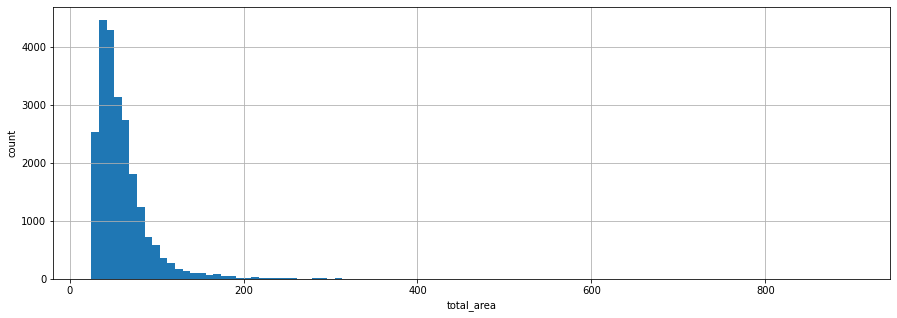

In [36]:
#рассмотрим распределение общей площади в целом

data['total_area'].hist(bins=100,figsize=(15,5))

plt.xlabel('total_area')
plt.ylabel('count')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Вы еще не проходили подписи графиков (осей), но можно их добавить, чтобы гистограмма стала информативнее. Можно почитать здесь, как добавить подписи: 
    
    https://www.geeksforgeeks.org/adding-labels-to-histogram-bars-in-matplotlib/

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил, спасибо).</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Молодец, что разобрался!

In [37]:
#видно, что основная часть площадей расположена до 200 кв.м, все, что больше, на уровне шума, срежем их

data = data.query('total_area <= 200')

In [38]:
pd.set_option('display.max_rows', 500)

data['ceiling_height'].value_counts().sort_values(ascending=False)

2.700     7541
2.500     4107
2.600     2106
2.550     1556
2.750     1086
3.000     1084
2.800      983
2.650      744
2.640      267
3.200      262
2.630      232
3.100      197
2.560      174
2.900      160
2.400      141
3.300      132
2.730      128
2.580      124
3.500      112
2.570      102
2.850      100
2.520       97
2.540       84
3.400       82
2.530       65
2.770       60
2.760       58
3.150       54
2.780       51
2.950       47
3.050       44
2.670       36
3.250       35
3.600       33
2.510       33
4.000       31
2.720       31
3.700       27
2.740       27
3.900       24
2.560       23
2.680       21
2.840       19
3.800       18
2.820       18
2.660       17
2.675       17
2.525       16
2.620       16
2.450       15
3.550       15
3.120       15
2.830       15
3.350       14
3.080       13
2.710       13
2.590       13
2.880       12
3.180       11
3.070       11
2.000       11
3.060       11
3.130       10
2.790       10
2.870       10
2.920        9
3.450     

Видно множество подозрительных значений, высота потолков более 10м (предположим, что это элитная недвижимость) и меньше минимально допустимого в 2.4м.

In [39]:
data.query('ceiling_height < 2.4').count()

total_images            20
last_price              20
total_area              20
first_day_exposition    20
rooms                   20
ceiling_height          20
floors_total            20
living_area             20
floor                   20
is_apartment            20
studio                  20
open_plan               20
kitchen_area            20
balcony                 20
locality_name           20
airports_nearest         6
cityCenters_nearest      6
parks_around3000         6
parks_nearest            4
ponds_around3000         6
ponds_nearest            5
days_exposition         20
dtype: int64

In [40]:
#поделим подозрительные значения на 10, остальные отбросим срезом

data.loc[data['ceiling_height'] > 11, 'ceiling_height'] = data.loc[data['ceiling_height'] > 11, 'ceiling_height'] / 10

data = data.query('ceiling_height >=2.4')

<AxesSubplot:>

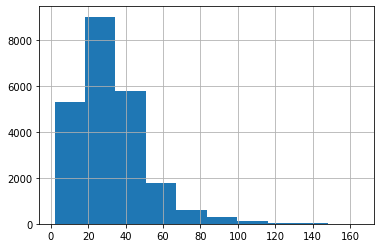

In [41]:
#рассмотрим распределения жилой площади

data['living_area'].hist()

In [42]:
data = data.query('living_area <= 120')

In [43]:
data = data.query('living_area >= 14')

Отбросим редкие значения более 120кв.м и меньше минимально допустимой в 14 кв.м.

<AxesSubplot:>

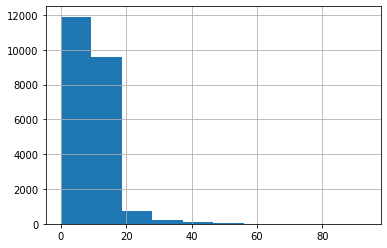

In [44]:
#распределение площадей кухни

data['kitchen_area'].hist()

In [45]:
#отбросим редкие значения более 60 кв.м

data = data.query('kitchen_area <= 60')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Можно еще обработать аномалии в цене

<AxesSubplot:>

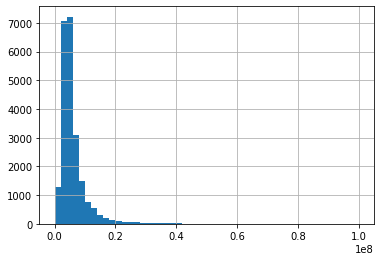

In [46]:
#посмотрим распределение цен

data['last_price'].hist(bins=50,range=(0,1e8))

In [47]:
#видно, что цены расположены в основном до 30 млн, срежем редкие

data = data.query('last_price < 3e7')

### Посчитайте и добавьте в таблицу новые столбцы

In [48]:
#расчёт цены за кв.м, добавим в новый столбец

data['price_m2'] = data['last_price'] / data['total_area']

In [49]:
#день, месяц и год выставления на продажу соответственно, добавляем в новые столбцы

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [50]:
data['month_exposition'] = data['first_day_exposition'].dt.month

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем (метод month может привести к ошибке). Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. В данной работе нам не нужно разделять месяца разных годов. Это практичеый совет на будущее:) 

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо, учту.</div>

In [51]:
data['year_exposition'] = data['first_day_exposition'].dt.year

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-100,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.789474,0,9,2018


In [52]:
#определим функцию для категории этажа

def categorize_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [53]:
#методом .apply() применим к исходной таблице по строкам

data['floor_type'] = data.apply(categorize_floor, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-100,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.789474,0,9,2018,другой


In [54]:
#рассчёт расстояния до центра в км

data['cityCenters_km'] = data['cityCenters_nearest'] / 1000

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-100,120370.370370,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,13.933
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,8.098
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,True,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

Построим и опишем распределения для каждого параметра:

<AxesSubplot:>

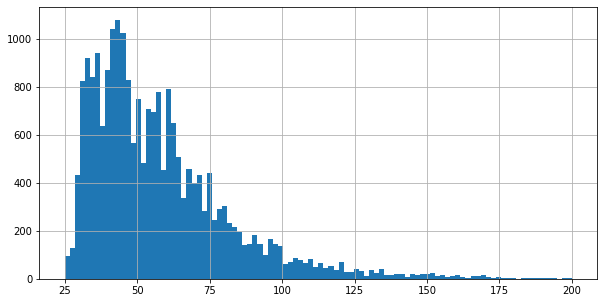

In [55]:
data['total_area'].hist(bins=100, figsize=(10,5))

In [56]:
data['total_area'].describe()

count    22421.000000
mean        57.798489
std         24.600625
min         25.000000
25%         40.400000
50%         52.000000
75%         68.400000
max        200.000000
Name: total_area, dtype: float64

Можно заметить, что больше всего представлено квартир с площадью около 30-45 кв.м. Следующий пик в районе 50-75 кв.м. После 130 кв.м, число предложений значительно уменьшается. Аномальных значений нет.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Верно

<AxesSubplot:>

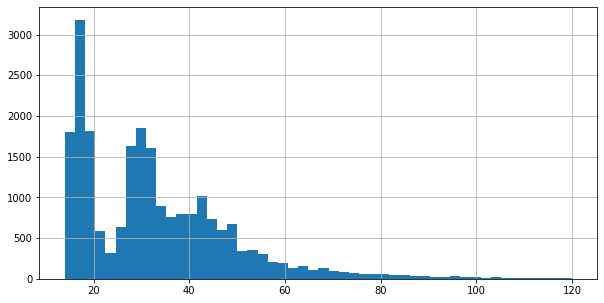

In [57]:
data['living_area'].hist(bins=50, figsize=(10,5))

In [58]:
data['living_area'].describe()

count    22421.00000
mean        33.11858
std         16.24470
min         14.00000
25%         19.00000
50%         30.00000
75%         42.00000
max        120.00000
Name: living_area, dtype: float64

Первый пик у малогабаритных квартир с жилой площадью около 15 кв.м. Далее провал около 22 кв.м, затем второй пик примерно на 30 кв.м.

<AxesSubplot:>

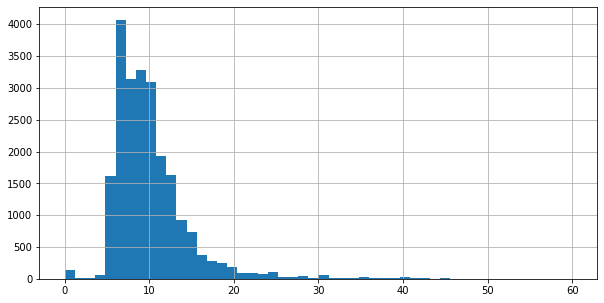

In [59]:
data['kitchen_area'].hist(bins=50,figsize=(10,5),range=(0,60))

In [60]:
data['kitchen_area'].describe()

count    22421.000000
mean        10.057987
std          4.748641
min          0.000000
25%          7.000000
50%          9.000000
75%         11.400000
max         60.000000
Name: kitchen_area, dtype: float64

Видно, что предложение в основном состоят из квартир с кухнями от 5 до 12 кв.м, далее число квартир плавно снижается. Студий и квартир с открытой планировкой довольно мало.

<AxesSubplot:>

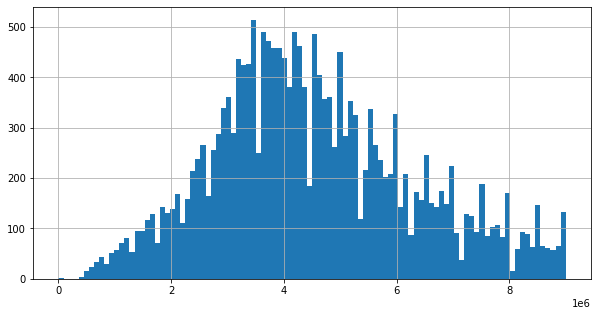

In [61]:
data['last_price'].hist(bins=100,figsize=(10,5), range=(0,9000000))

In [62]:
(data['last_price']/1e6).describe()

count    22421.000000
mean         5.694401
std          3.854912
min          0.012190
25%          3.450000
50%          4.600000
75%          6.649000
max         29.999000
Name: last_price, dtype: float64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Простой способ избавить от е-формата чисел при анализе данного столбца - перевести значения в колонке last_price из руб в млн руб. Для этого значения в колонке last_price нужно разделить на 1 000 000.

<div class="alert alert-info"> <b>Комментарий студента:</b> Да, действительно, разделил</div>

Распределение цен практически симметричное, близко к нормальному. Преобладают квартиры с ценой примерно от 3.8 до 5.5 млн.руб.

<AxesSubplot:>

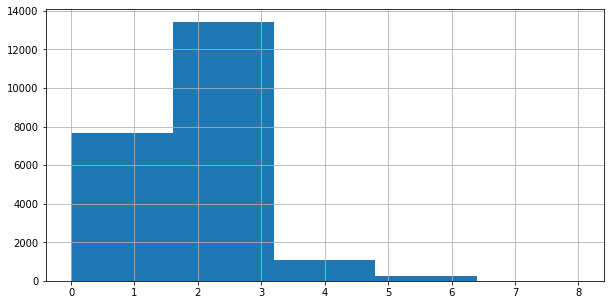

In [63]:
data['rooms'].hist(bins=5,figsize=(10,5))

In [64]:
data['rooms'].describe()

count    22421.000000
mean         2.041122
std          0.967631
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Видно, что большинство предложений представлено квартирами с комнатами от 1 до 3.

<AxesSubplot:>

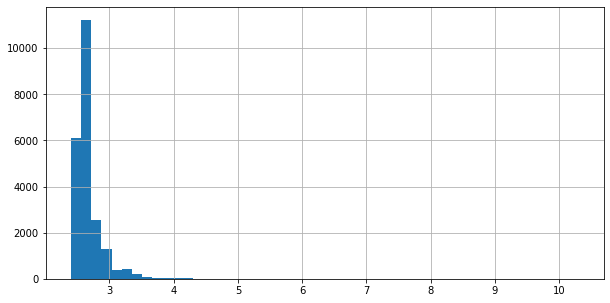

In [65]:
data['ceiling_height'].hist(bins=50,figsize=(10,5))

In [66]:
data['ceiling_height'].describe()

count    22421.000000
mean         2.695531
std          0.227865
min          2.400000
25%          2.550000
50%          2.700000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

Высота потолков представленных квартирах, в основном, не превышает 3м.

<AxesSubplot:>

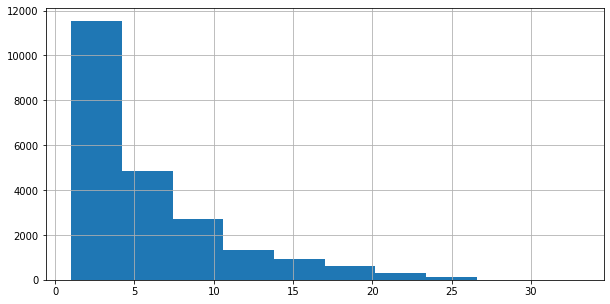

In [67]:
data['floor'].hist(bins=10,figsize=(10,5))

In [68]:
data['floor'].describe()

count    22421.000000
mean         5.865885
std          4.860818
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Видно, что большая доля квартир расположена на этаже не выше 4го.

<AxesSubplot:>

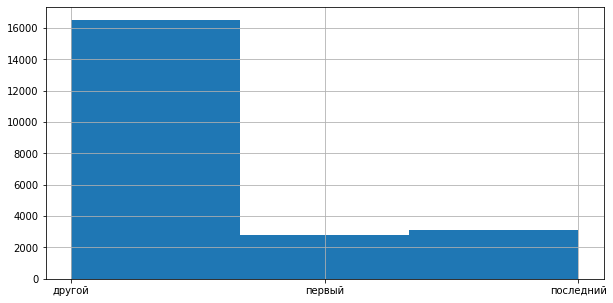

In [69]:
data['floor_type'].hist(bins=3,figsize=(10,5))

In [70]:
data['floor_type'].describe()

count      22421
unique         3
top       другой
freq       16513
Name: floor_type, dtype: object

Большая часть квартир расположена в интервале между вторым и предпоследним, доля у квартир на первом и последнем этажах примерно равная.

<AxesSubplot:>

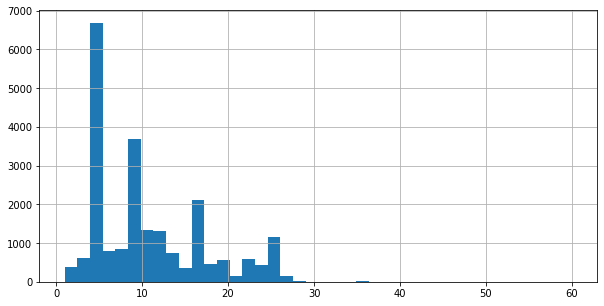

In [71]:
data['floors_total'].hist(bins=40,figsize=(10,5))

In [72]:
data['floors_total'].describe()

count    22421.00000
mean        10.67633
std          6.57145
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64

Выраженные 4 пика. Большая доля примерно у 5этажных домов, далее 7-9этажные, затем 17 и 25этажные. Квартиры расположены в многоэтажных домах.

<AxesSubplot:>

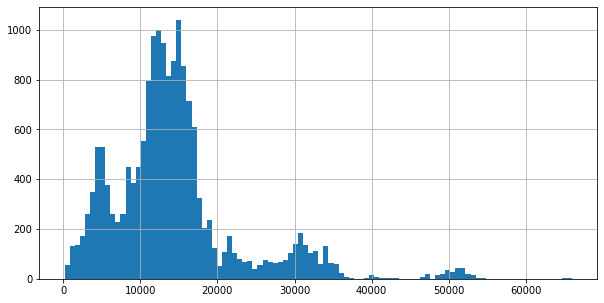

In [73]:
data['cityCenters_nearest'].hist(bins=100,figsize=(10,5))

In [74]:
data['cityCenters_nearest'].describe()

count    17188.000000
mean     14398.373516
std       8596.781759
min        208.000000
25%       9659.000000
50%      13222.000000
75%      16361.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Первый пик в районе 5000м, второй примерно в интервале 13000-17000 метров, третий пик около 32000м. 

<AxesSubplot:>

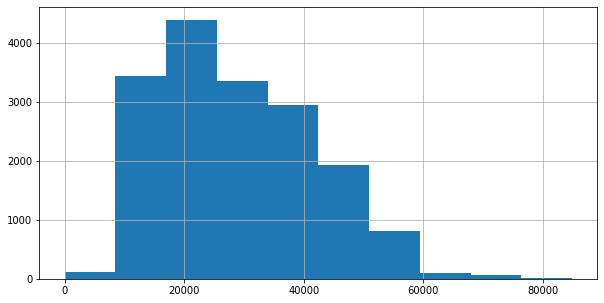

In [75]:
data['airports_nearest'].hist(figsize=(10,5))

In [76]:
data['airports_nearest'].describe()

count    17168.000000
mean     28852.210799
std      12723.195536
min          0.000000
25%      18440.250000
50%      26893.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Пик на 20000м, далее расстояние плавно увеличивается. Видимо, от центра в область. Смущает значение с расстоянием 0.

In [77]:
data.query('airports_nearest ==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_km
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,True,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60,201729.106628,6,9,2018,другой,22.801


Всего одно, можно его не учитывать.

<AxesSubplot:>

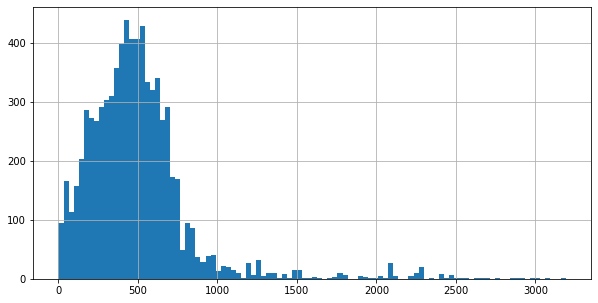

In [78]:
data['parks_nearest'].hist(bins=100,figsize=(10,5))

In [79]:
data['parks_nearest'].describe()

count    7532.000000
mean      494.055895
std       340.778688
min         1.000000
25%       292.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Из имеющихся данных на примерно 7800 квартир - почти все они расположены довольно близко к парку, в пределах 1000м.

<AxesSubplot:>

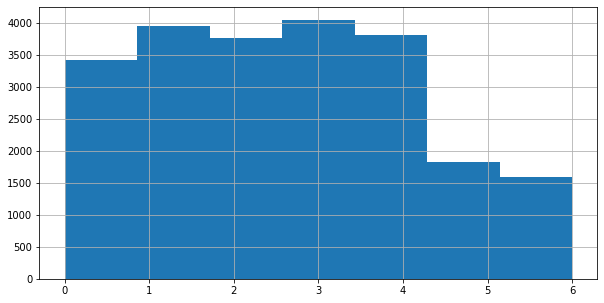

In [80]:
data['weekday_exposition'].hist(bins=7,figsize=(10,5))

In [81]:
data['weekday_exposition'].describe()

count    22421.000000
mean         2.567504
std          1.787246
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

Можно увидеть, что большая часть объявлений размещалась в будние дни.

<AxesSubplot:>

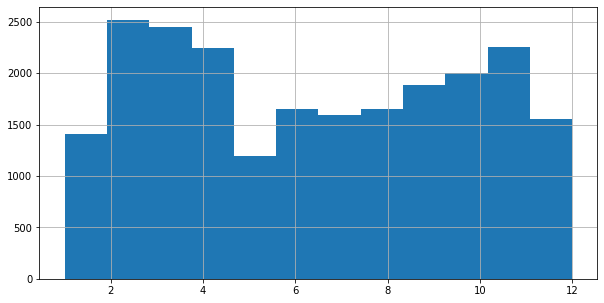

In [82]:
data['month_exposition'].hist(bins=12,figsize=(10,5))

In [83]:
data['month_exposition'].describe()

count    22421.000000
mean         6.403729
std          3.495348
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

Виден скачок активности с февраля по апрель, спад в мае, видимо, из-за праздников, и дальше плавный рост с июня ноябрь. В декабре снова спад, также наверно из-за подготовки к встрече Нового года.

<AxesSubplot:>

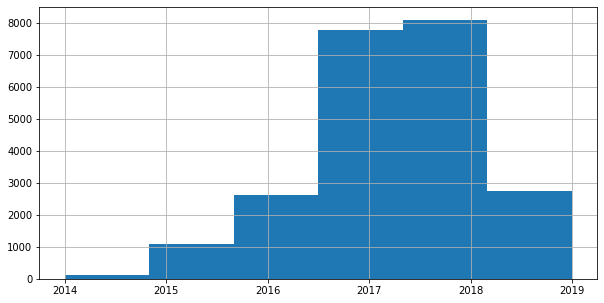

In [84]:
data['year_exposition'].hist(bins=6,figsize=(10,5))

In [85]:
data['year_exposition'].describe()

count    22421.000000
mean      2017.375541
std          1.033859
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exposition, dtype: float64

Видно, что пик активности пришёлся на 2017 и 2018 годы.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Все так

**Задание. Изучите, как быстро продавались квартиры (столбец days_exposition).**

<AxesSubplot:>

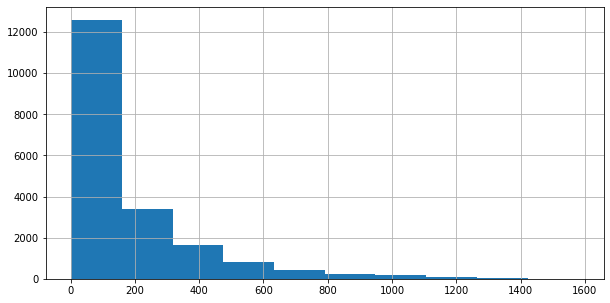

In [86]:
#строим гистограмму с учётом маркера, которым заполняли пропуски (-100)

data.query('days_exposition > 0')['days_exposition'].hist(figsize=(10,5))

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Молодец, что не забыл откинуть заглушку. Она бы исказила результаты

In [87]:
data.query('days_exposition > 0')['days_exposition'].describe()

count    19430.000000
mean       179.828204
std        218.416426
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры находились в продаже около 180 дней, но видны также сильные выбросы: некоторые квартиры продавались и за 1 день и "висели" больше 4-х лет. Поэтому среднее почти в два раза больше медианного числа дней. Так что, надёжнее будет предположить, что продажа занимает около 95 дней.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Корректно

**Задание. Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

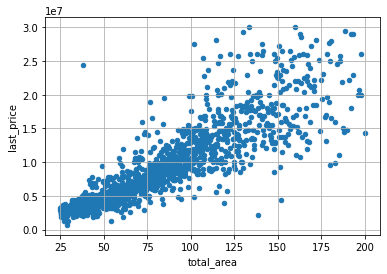

In [88]:
#построим диаграммы для каждого параметра отдельно и подсчитаем коэф. корреляции, где возможно

(data
 .pivot_table(index='total_area', values='last_price')
 .reset_index()
 .plot(x='total_area', y='last_price', kind='scatter',grid=True)
)

In [89]:
data.pivot_table(index='total_area', values='last_price').reset_index().corr()

,total_area,last_price
total_area,1.000000,0.881454
last_price,0.881454,1.000000


Точки в целом ложатся на прямую. Видно, что зависимость цены от общей площади прямая и достаточно сильная, коэффициент корреляции больше 0.7.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

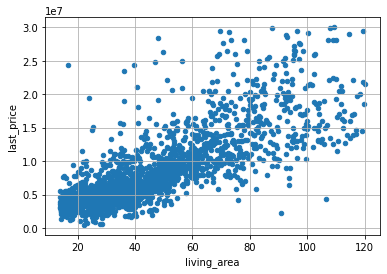

In [90]:
(data
 .pivot_table(index='living_area', values='last_price')
 .reset_index()
 .plot(x='living_area', y='last_price', kind='scatter',grid=True)
)

In [91]:
data.pivot_table(index='living_area', values='last_price').reset_index().corr()

,living_area,last_price
living_area,1.000000,0.799939
last_price,0.799939,1.000000


Взаимосвязь цены с жилой площадью также прямая, достаточно сильная, коэффициент Пирсона 0.8.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

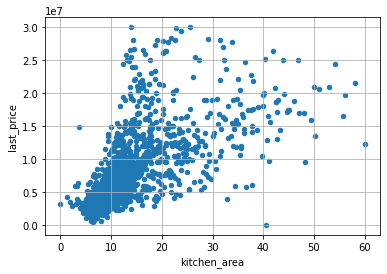

In [92]:
(data
 .pivot_table(index='kitchen_area', values='last_price')
 .reset_index()
 .plot(x='kitchen_area', y='last_price', kind='scatter',grid=True)
)

In [93]:
data.pivot_table(index='kitchen_area', values='last_price').reset_index().corr()

,kitchen_area,last_price
kitchen_area,1.0000,0.6529
last_price,0.6529,1.0000


Прямая зависимость присутствует, но менее выраженная, коэффициент корреляции 0.65.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

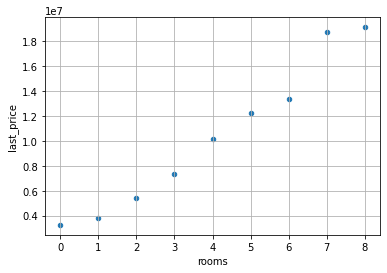

In [94]:
(data
 .pivot_table(index='rooms', values='last_price')
 .reset_index()
 .plot(x='rooms', y='last_price', kind='scatter',grid=True)
)

In [95]:
data.pivot_table(index='rooms', values='last_price').reset_index().corr()

,rooms,last_price
rooms,1.000000,0.984632
last_price,0.984632,1.000000


Сильная связь очевидна, чем больше комнат, тем больше цена.

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

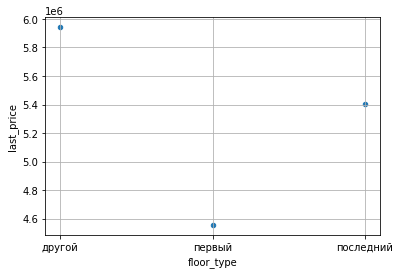

In [96]:
(data
 .pivot_table(index='floor_type', values='last_price')
 .reset_index()
 .plot(x='floor_type', y='last_price', kind='scatter',grid=True)
)

Можно сказать, что квартиры на первых и последних этажах стоят дешевле в среднем. 

<AxesSubplot:xlabel='weekday_exposition', ylabel='last_price'>

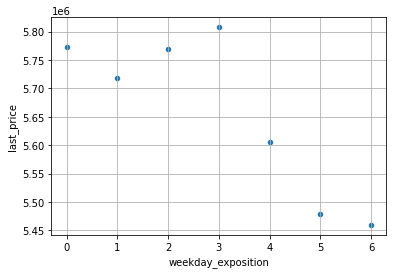

In [97]:
(data
 .pivot_table(index='weekday_exposition', values='last_price')
 .reset_index()
 .plot(x='weekday_exposition', y='last_price', kind='scatter',grid=True)
)

Интересно, что самые дорогие квартиры выставлялись в первой половине недели с пиком четверг. Выставленные в выходные стоили дешевле, особенно в воскресенье.

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

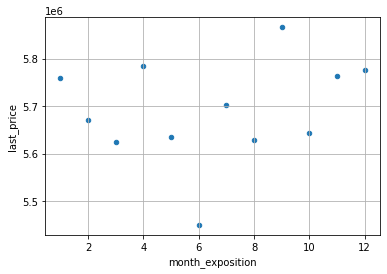

In [98]:
(data
 .pivot_table(index='month_exposition', values='last_price')
 .reset_index()
 .plot(x='month_exposition', y='last_price', kind='scatter',grid=True)
)

Присутствует некоторая сезонность. Можно сказать, цены в начале года были ниже, но с апреля наметилась тендеция к росту.

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

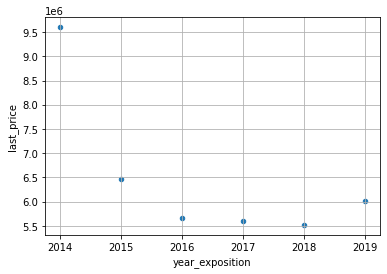

In [99]:
(data
 .pivot_table(index='year_exposition', values='last_price')
 .reset_index()
 .plot(x='year_exposition', y='last_price', kind='scatter',grid=True)
)

Видно заметное падение цен с 2014го. Вероятно, связано с экономическим кризисом 2014-2015 годов.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Ты прав. Зависимость лучше всего показывает корреляция Пирсона. На параметрах 'last_price',  'total_area' (и другие площади), 'rooms', 'cityCenters_nearest' коэффициент корреляции Пирсона работает хорошо. Но применение его к остальным параметрам - типу этажа, дню недели, году, и месяцу - не эффективно, т.к. цена квартиры зависит от них не линейно. Остальные параметры можно рассмотреть на обычных диаграммах, к примеру, столбчатых или линейных, сгруппировав данные по нужным параметрам и рассмотрев среднее цены.
    
    
    
Давай еще немного поработаем с корреляцией. Более наглядно можно было бы сделать следующим образом:
    
1) построить корреляцию матрицей для нужных параметров
 
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
    
2) интерпретировать получившийся коэффициент
    
3) для визуализации параметров использовать простой и полезный метод sns.pairplot - он отобразит корреляцию всех графиков компактным "полотном"
    
4) для остальных параметров построим обычные графики - заменим точки на линии или столбцы для наглядности
    
</div>

In [100]:
#построим матрицу корреляции для набора параметров

matrix_corr = data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

matrix_corr

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.781413,0.481266,-0.347815
total_area,0.781413,1.000000,0.784713,-0.222044
rooms,0.481266,0.784713,1.000000,-0.151158
cityCenters_nearest,-0.347815,-0.222044,-0.151158,1.000000


Наглядно видна взаимосвязь между параметрами. Нас интересует цена, которая напрямую зависит от общей площади, числа комнат и обратно от расстояния до центра, чем дальше, тем цена меньше.

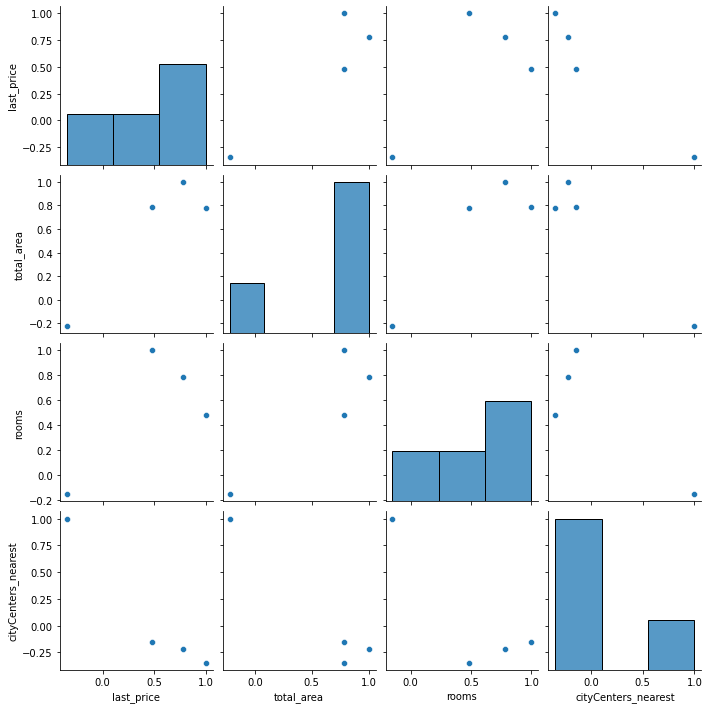

In [101]:
#построим матрицу графиков корреляции

sns.pairplot(matrix_corr)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Получилось отлично! Визуализацию лучше строить на параметрах без корреляции, так как этот метод сразу отрисовывает зависимости

<AxesSubplot:xlabel='floor_type'>

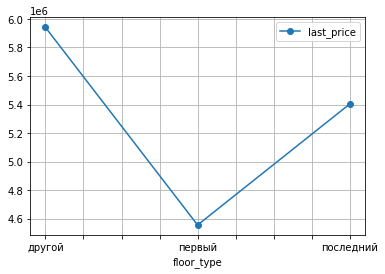

In [102]:
#строим линейные диаграммы для типа этажа, дня недели, месяца, года

(data
 .pivot_table(index='floor_type', values='last_price')
 .reset_index()
 .plot(x='floor_type', y='last_price',style='o-', grid=True)
)

<AxesSubplot:xlabel='weekday_exposition'>

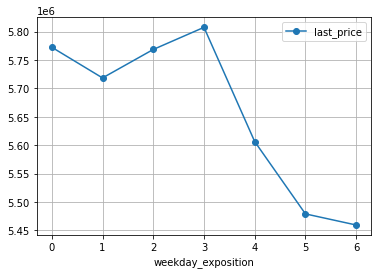

In [103]:
(data
 .pivot_table(index='weekday_exposition', values='last_price')
 .reset_index()
 .plot(x='weekday_exposition', y='last_price',style='o-', grid=True)
)

<AxesSubplot:xlabel='month_exposition'>

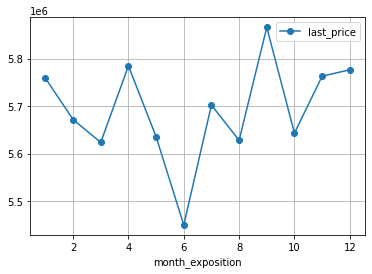

In [104]:
(data
 .pivot_table(index='month_exposition', values='last_price')
 .reset_index()
 .plot(x='month_exposition', y='last_price',style='o-', grid=True)
)

<AxesSubplot:xlabel='year_exposition'>

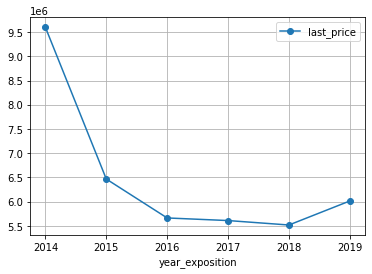

In [105]:
(data
 .pivot_table(index='year_exposition', values='last_price')
 .reset_index()
 .plot(x='year_exposition', y='last_price',style='o-', grid=True)
)

<div class="alert alert-info"> <b>Готово. Тут, наверное, ещё уместно было бы добавить линию тренда, в экселе это просто делается, а для питона простого способа не нашёл. Подскажешь, как?</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Вот тут есть способы, как это сделать:
    
    https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

**Задание. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [106]:
#найдём 10 населённых пунктов с наибольшим числом объявлений

local_top10 = data['locality_name'].value_counts().head(10)

local_top10

Санкт-Петербург    14844
Мурино               521
Кудрово              433
Шушары               418
Всеволожск           379
Пушкин               357
Колпино              333
Парголово            304
Гатчина              302
Выборг               227
Name: locality_name, dtype: int64

In [107]:
#сделаем срез по индексам топ10, построим сводную таблицу с ценой за кв.м. и отсортируем по убыванию

(data
 .query('locality_name in @local_top10.index')
 .pivot_table(index='locality_name', values='price_m2')
 .reset_index()
 .sort_values(by='price_m2',ascending=False)
)

,locality_name,price_m2
8,Санкт-Петербург,110279.305536
7,Пушкин,102918.116596
4,Кудрово,94662.379932
6,Парголово,89820.556891
5,Мурино,85065.111174
9,Шушары,77461.967782
3,Колпино,75264.456609
2,Гатчина,68816.292747
0,Всеволожск,68671.945215
1,Выборг,57897.023094


In [108]:
m2_top10 = (
    data
    .query('locality_name in @local_top10.index')
    .pivot_table(index='locality_name', values='price_m2')
    .reset_index()
    .sort_values(by='price_m2',ascending=False)
)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Корректно

**Задание. Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [109]:
#сделаем срез по Санкт-Петербургу

data_spb = data.query('locality_name =="Санкт-Петербург"')

In [110]:
#добавим столбец с расчётом цены за каждый километр от центра

data_spb['priceCenter_per_km'] = data_spb['last_price'] / data_spb['cityCenters_km']

In [111]:
#создадим сводную таблицу с расчётом медианного значения цены за километр от центра

price_per_km = (
    data_spb
    .pivot_table(index='cityCenters_km', values='priceCenter_per_km', aggfunc='median')
    .reset_index()
    .sort_values(by='priceCenter_per_km')
)

Text(0, 0.5, 'priceCenter_per_km')

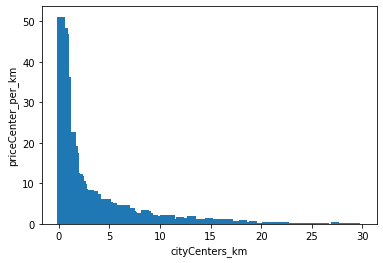

In [112]:
#строим столбчатый график зависимости расстояния от центра и медианной цены за километр от центра

plt.bar(price_per_km['cityCenters_km'],price_per_km['priceCenter_per_km']/1e6)

plt.xlabel('cityCenters_km')

plt.ylabel('priceCenter_per_km')

Можно отметить, что самые дорогие объекты находятся вблизи центра города, причем пик цен у квартир в 1-2 км от центра. Вероятно, шаговая доступность центра ценится больше, чем нахождение в самом центре.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Верно, центр Пиетра находится в радиусе 4-5 км. Исторический центр всегда дороже. Безусловно, могут встречаться дорогие экземпляры за чертой центра - но на их стоимость может влиять наличие прудов и парков, а также экологичность района

### Общий вывод

В целом, можно сказать, что наиболее определяющими параметрами в цене квартир являются общая площадь, жилая площадь, число комнат, расстояние от центра, а также, скорее всего, экономическая обстановка в стране. Также обнаружена связь, но менее сильная, с такими параметрами как площадь кухни, день и месяц выставления на продажу, тип этажа.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>  Вывод - это полный отчет о проделанной работе. Он должен содержать все: от обработки данных до рекомендаций заказчику. Я бы советовала в начале кратко описывать, с какими данными мы работали и что сделали, а затем отвечать на вопрос исследования - в нашем случае, установить примерную рыночную стоимость для объектов,  исходя из влияния параметров (стоимость по районам и какие факторы на нее влияют)  - средняя стоимость в общей базе и средняя в центре

Был изучен набор данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

В процессе проведена предобработка данных: где возможно, заполнены пропуски, выполнена чистка от аномальных значений и неявных дубликатов, изменены типы данных в столбцах.

Изучены и описаны параметры объектов. Также в ходе исследования определено:

* продажа квартиры занимает примерно 95 дней.

* подсчитана средняя цена квадратного метра в 10 населенных с наибольшим числом объявлений:

In [113]:
m2_top10

,locality_name,price_m2
8,Санкт-Петербург,110279.305536
7,Пушкин,102918.116596
4,Кудрово,94662.379932
6,Парголово,89820.556891
5,Мурино,85065.111174
9,Шушары,77461.967782
3,Колпино,75264.456609
2,Гатчина,68816.292747
0,Всеволожск,68671.945215
1,Выборг,57897.023094


* наиболее определяющими параметрами в цене квартир являются общая площадь, жилая площадь, площадь кухни, число комнат, расстояние от центра, а также, скорее всего, экономическая обстановка в стране; также обнаружена связь с такими параметрами как день и месяц выставления на продажу, тип этажа.

* самые дорогие объекты в Санкт-Петербурге расположены в центре города и примерно в 3-х километрах от него

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Вывод четко структурирован и отражает цели исследования

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Спасибо за проект! Видно, что ты старался и он получился очень сильным. Ты аккуратно работаешь с данными и выносишь качественные предположения - как настоящий аналитик. Давай сделаем его еще лучше: 
    
- построим общую гистограмму для всех столбцов таблицы
- немного поработаем с корреляцией
- расширим финальный вывод. 
    
Оставила направляющие комментарии. Возвращаю тебе работу, чтобы ты смог задать вопросы. Буду ждать твою работу на финальное ревью!
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за добрые слова! Действительно, долго сидел и переживал, что всё неправильно %)).</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Спасибо за проработку комментариев! Теперь все отлично. Если у тебя возникнут вопросы, смело задавай мне их через куратора. Удачи на следующих этапах!